In [2]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#print(x_test)
#print(y_test)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


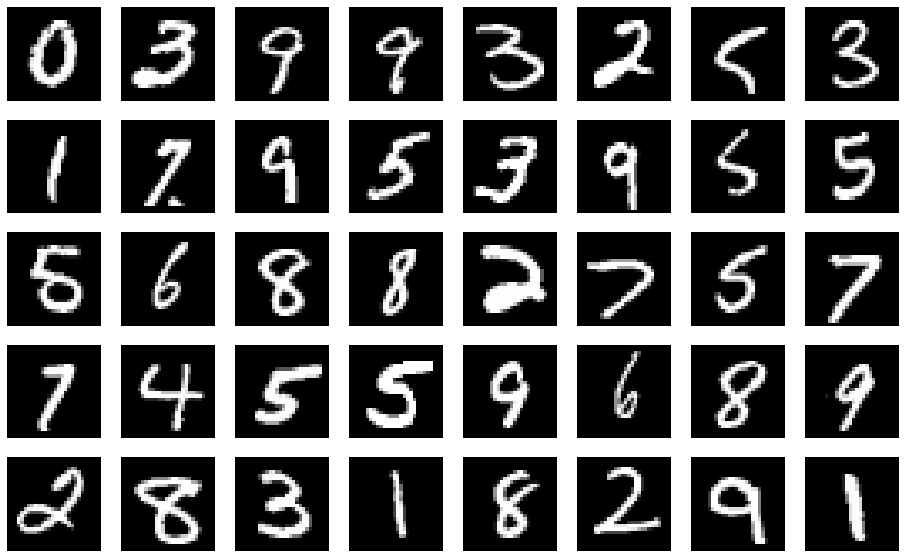

In [3]:
import matplotlib.pyplot as plt
from random import randrange

plt.figure(figsize=(16,10),facecolor='w')
for i in range(5):
  for j in range(8):
    index=randrange(0,60000)
    plt.subplot(5,8,i*8+j+1)
    plt.imshow(x_train[index],plt.cm.gray)
    plt.axis('off')
plt.show()

In [4]:
print('長寬這二維圖像轉換為一維數值，MLP才能進行處理')
x_train=x_train.reshape(60000,784)
x_train=x_train/255
x_test=x_test.reshape(10000,784)
x_test=x_test/255

長寬這二維圖像轉換為一維數值，MLP才能進行處理


In [5]:
from tensorflow.keras.utils import to_categorical
# 轉 one-hot encoding
y_train=to_categorical(y_train,10)
print(y_test)
y_test=to_categorical(y_test,10)
print(y_test)

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense

print('產生兩個模型')
model1=Sequential()
model2=Sequential()
print('加入輸入層')
model1.add(InputLayer(input_shape=(784,)))
model2.add(InputLayer(input_shape=(784,)))
print('加入一個隱藏層')
model1.add(Dense(units=64,activation='relu'))
model2.add(Dense(units=64,activation='relu'))
print('多加入一個隱藏層')
model1.add(Dense(units=64,activation='relu'))
model2.add(Dense(units=64,activation='relu'))
print('設定輸出層與編譯，二分法部分')
model1.add(Dense(units=10,activation='sigmoid'))
model1.summary()
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('設定輸出層與編譯，多分類部分')
model2.add(Dense(units=10,activation='softmax'))
model2.summary()
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

產生兩個模型
加入輸入層
加入一個隱藏層
多加入一個隱藏層
設定輸出層與編譯，二分法部分
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
設定輸出層與編譯，多分類部分
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                    

針對二分法進行訓練與驗證
Epoch 1/20
1688/1688 - 3s - loss: 0.0663 - accuracy: 0.9016 - val_loss: 0.0272 - val_accuracy: 0.9642 - 3s/epoch - 2ms/step
Epoch 2/20
1688/1688 - 2s - loss: 0.0262 - accuracy: 0.9611 - val_loss: 0.0186 - val_accuracy: 0.9715 - 2s/epoch - 1ms/step
Epoch 3/20
1688/1688 - 2s - loss: 0.0186 - accuracy: 0.9724 - val_loss: 0.0166 - val_accuracy: 0.9770 - 2s/epoch - 997us/step
Epoch 4/20
1688/1688 - 2s - loss: 0.0147 - accuracy: 0.9780 - val_loss: 0.0156 - val_accuracy: 0.9777 - 2s/epoch - 1ms/step
Epoch 5/20
1688/1688 - 2s - loss: 0.0120 - accuracy: 0.9827 - val_loss: 0.0162 - val_accuracy: 0.9763 - 2s/epoch - 1ms/step
Epoch 6/20
1688/1688 - 2s - loss: 0.0100 - accuracy: 0.9852 - val_loss: 0.0152 - val_accuracy: 0.9760 - 2s/epoch - 1ms/step
Epoch 7/20
1688/1688 - 2s - loss: 0.0083 - accuracy: 0.9880 - val_loss: 0.0160 - val_accuracy: 0.9757 - 2s/epoch - 1ms/step
Epoch 8/20
1688/1688 - 2s - loss: 0.0070 - accuracy: 0.9900 - val_loss: 0.0148 - val_accuracy: 0.9790 - 2s/epoch - 1m

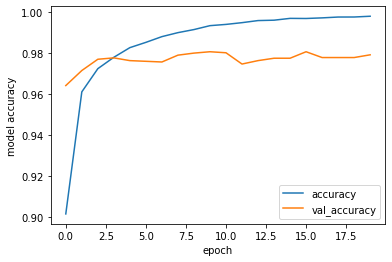

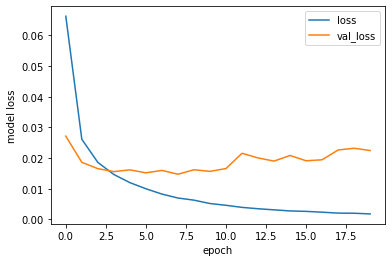

In [7]:
print('針對二分法進行訓練與驗證')
history=model1.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_split=0.1,verbose=2)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

針對多分類進行訓練與驗證
60000
Epoch 1/20
1688/1688 - 2s - loss: 0.2962 - accuracy: 0.9126 - val_loss: 0.1419 - val_accuracy: 0.9588 - 2s/epoch - 1ms/step
Epoch 2/20
1688/1688 - 2s - loss: 0.1335 - accuracy: 0.9595 - val_loss: 0.1032 - val_accuracy: 0.9707 - 2s/epoch - 1ms/step
Epoch 3/20
1688/1688 - 2s - loss: 0.0978 - accuracy: 0.9701 - val_loss: 0.0935 - val_accuracy: 0.9745 - 2s/epoch - 1ms/step
Epoch 4/20
1688/1688 - 2s - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.1072 - val_accuracy: 0.9695 - 2s/epoch - 982us/step
Epoch 5/20
1688/1688 - 2s - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.1032 - val_accuracy: 0.9720 - 2s/epoch - 995us/step
Epoch 6/20
1688/1688 - 2s - loss: 0.0530 - accuracy: 0.9830 - val_loss: 0.0972 - val_accuracy: 0.9748 - 2s/epoch - 1ms/step
Epoch 7/20
1688/1688 - 2s - loss: 0.0443 - accuracy: 0.9857 - val_loss: 0.0942 - val_accuracy: 0.9747 - 2s/epoch - 995us/step
Epoch 8/20
1688/1688 - 2s - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0937 - val_accuracy: 0.9758 - 2s/

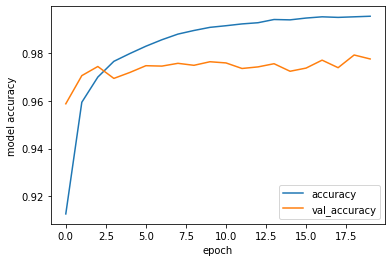

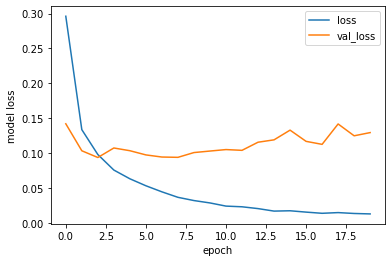

In [8]:
print('針對多分類進行訓練與驗證')
print(len(x_train))
history=model2.fit(x=x_train,y=y_train,epochs=20,batch_size=32,validation_split=0.1,verbose=2)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

針對二分法進行訓練與驗證，增加訓練調回的設定
Epoch 1/20
1688/1688 - 5s - loss: 0.0462 - accuracy: 0.9334 - val_loss: 0.0386 - val_accuracy: 0.9488 - 5s/epoch - 3ms/step
Epoch 2/20
1688/1688 - 6s - loss: 0.0451 - accuracy: 0.9355 - val_loss: 0.0377 - val_accuracy: 0.9503 - 6s/epoch - 3ms/step
Epoch 3/20
1688/1688 - 5s - loss: 0.0440 - accuracy: 0.9371 - val_loss: 0.0369 - val_accuracy: 0.9503 - 5s/epoch - 3ms/step
Epoch 4/20
1688/1688 - 6s - loss: 0.0430 - accuracy: 0.9389 - val_loss: 0.0359 - val_accuracy: 0.9522 - 6s/epoch - 3ms/step
Epoch 5/20
1688/1688 - 5s - loss: 0.0420 - accuracy: 0.9402 - val_loss: 0.0353 - val_accuracy: 0.9515 - 5s/epoch - 3ms/step
Epoch 6/20
1688/1688 - 6s - loss: 0.0411 - accuracy: 0.9415 - val_loss: 0.0346 - val_accuracy: 0.9528 - 6s/epoch - 3ms/step
Epoch 7/20
1688/1688 - 5s - loss: 0.0403 - accuracy: 0.9429 - val_loss: 0.0340 - val_accuracy: 0.9540 - 5s/epoch - 3ms/step
Epoch 8/20
1688/1688 - 5s - loss: 0.0395 - accuracy: 0.9442 - val_loss: 0.0333 - val_accuracy: 0.9548 - 5s/ep

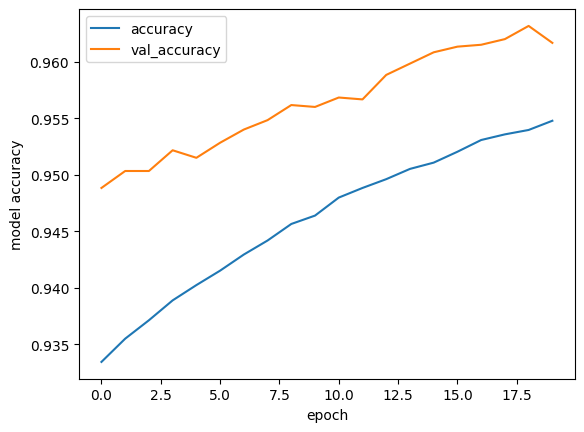

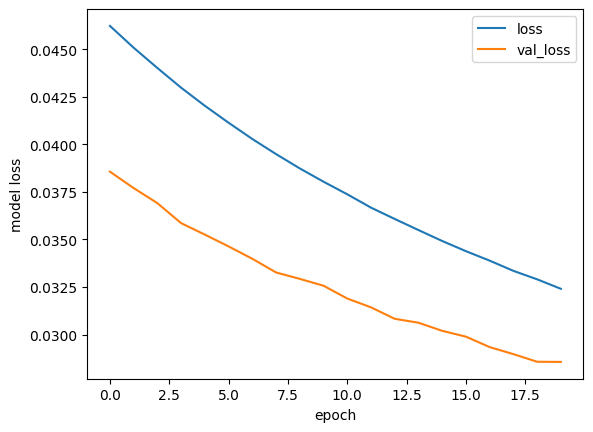

In [ ]:
print('針對二分法進行訓練與驗證，增加訓練調回的設定')
import tensorflow as tf
my_callbacks=[
 tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_accuracy')
]
history=model1.fit(
    x=x_train,y=y_train,epochs=20,batch_size=32,
    validation_split=0.1,verbose=2,callbacks=my_callbacks)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

針對多分類進行訓練與驗證，增加訓練調回的設定
Epoch 1/20
1688/1688 - 6s - loss: 0.0864 - accuracy: 0.9750 - val_loss: 0.1079 - val_accuracy: 0.9683 - 6s/epoch - 4ms/step
Epoch 2/20
1688/1688 - 5s - loss: 0.0855 - accuracy: 0.9759 - val_loss: 0.1093 - val_accuracy: 0.9690 - 5s/epoch - 3ms/step
Epoch 3/20
1688/1688 - 7s - loss: 0.0848 - accuracy: 0.9757 - val_loss: 0.1096 - val_accuracy: 0.9693 - 7s/epoch - 4ms/step
Epoch 4/20
1688/1688 - 5s - loss: 0.0841 - accuracy: 0.9757 - val_loss: 0.1096 - val_accuracy: 0.9693 - 5s/epoch - 3ms/step
Epoch 5/20
1688/1688 - 5s - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.1084 - val_accuracy: 0.9692 - 5s/epoch - 3ms/step
Epoch 6/20
1688/1688 - 5s - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.1093 - val_accuracy: 0.9695 - 5s/epoch - 3ms/step
Epoch 7/20
1688/1688 - 4s - loss: 0.0822 - accuracy: 0.9764 - val_loss: 0.1069 - val_accuracy: 0.9688 - 4s/epoch - 3ms/step
Epoch 8/20
1688/1688 - 5s - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.1075 - val_accuracy: 0.9698 - 5s/ep

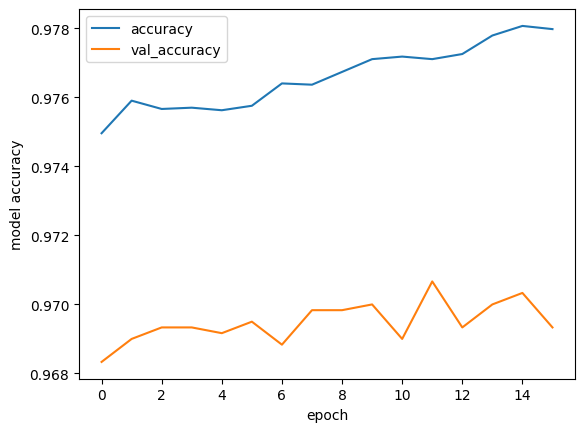

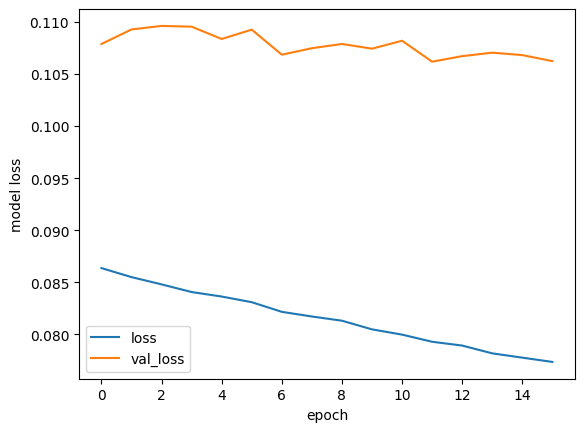

In [ ]:
print('針對多分類進行訓練與驗證，增加訓練調回的設定')
import tensorflow as tf
my_callbacks=[
 tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_accuracy')
]
history=model2.fit(
    x=x_train,y=y_train,epochs=20,batch_size=32,
    validation_split=0.1,verbose=2,callbacks=my_callbacks)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend()
plt.show()